# Ensemble Methods

## Question:  What was the biggest problem with decision trees?

One of the major drawbacks of decision trees is that they overfit the data and do not generalize well to new data.

Ensemble methods can help tackle this problem by training a group of decision tree classifiers on different random subsets of the training data and then combining the predictions of the individual trees to make an even more powerful prediction.

Two most common Ensemble models are **Random Forests** and **Gradient Boosted Trees** although there are many more you can learn about.


## Outcomes

By the end of the lesson students will be able to 
- Differentiate between decision trees and random forest 
- Explain what makes random forest so powerful
- Build a random forest in `sklearn`
- Explore the fine-tuning options in `sklearn` for random forest



Bonus Objectives:
- Differentiate between random forest and boosting methods
- Build a gradient boosted model in `sklearn`
- Explore the fine-tuning options in `sklearn` for gradient boosted models


# Random Forest
### aka, a lot of random trees

![forest](img/forest.jpeg)

### Scenario: 
We've made a decision tree, but we are concerned it might not generalize well. What to do?


### Could use k-fold cross validation

![dectree](img/decisiontree.png)

### But with same data, might get same results
![same](img/sameresult.png)

### It's like crowd sourcing. 
Could ask a lot of **_similar_** people
![min](img/minions.gif)

Or could ask a more _**diverse**_ group of people
![waldo](img/waldo.gif)

### Want to create a more diverse set of trees

![forest](img/randomforest.png)

### How do you diversify?

You create $m$ trees that randomly sample from the your data.<br>
Then at each node, $p$ features are randomly chosen to be considered when splitting.

![mind](img/mindblown.gif)

### Specifics:

 $m$ trees defaults to 100 unless otherwise specified.<br>
 $p$ features defaults to square root of total features.

### Bagging

This technique is called _bagging_ because the samples are **_bootstrapped_** and then the results of each tree are **_aggregated_**

![bag](img/bag.jpeg)


<img src= "./img/rand_forest_diagram.png" style = "width: 600">

### Built in cross-validation

Because each tree is made on a **sample**, the algorithm also calculates the **Out of Bag**(OOB) Error averaged for each tree. 

<img src= "./img/oob.png" width= 400>

## Back to the diabetes scenario

Let's start with a basic decision tree that we can use to compare to our new and improved Ensemble methods!

In [1]:
# libraries for decision trees

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree 
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
# New ones for random forest

np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = diabetes.drop(columns=['Outcome'])
Y = diabetes['Outcome']

In [6]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 10)  

In [8]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [9]:
y_pred = classifier.predict(X_train)  

Accuracy is :100.0

AUC is :1.0


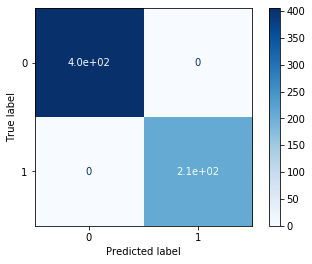

In [10]:
acc = accuracy_score(y_train,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
plot_confusion_matrix(classifier, X_train, y_train, cmap='Blues')

### Your Turn

1. Create a second DT classifier but now use entropy as the criterion and max depth =5.

2. Fit the model on the training data

3. Print the accuracy, AUC, and confusion matrix.

4. Use `cross_val_score` to see how this model generalizes.

4. Compare this model to our previous model.

In [11]:
#your code here

Accuracy is :82.41042345276874

AUC is :0.79

Confusion Matrix


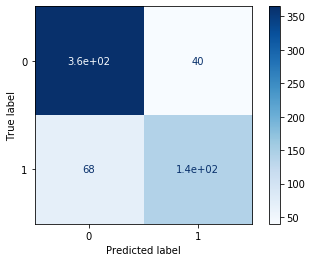

In [12]:
# __SOLUTION__
# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=5)  
classifier2.fit(X_train, y_train)  
# Make predictions for test data
y_pred = classifier2.predict(X_train) 
# Calculate Accuracy 
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy is :{0}".format(acc))
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
plot_confusion_matrix(classifier2, X_train, y_train, cmap='Blues')


In [13]:
cross_val_score(classifier2, X_train, y_train, cv=5)

array([0.76422764, 0.7398374 , 0.69918699, 0.72357724, 0.74590164])

### Feature Importances!

We also can obtain the feature importances of our tree based models.  These rates how important each feature is for a decision a tree makes.  It is a number between 0 and 1 for each feature where 0 indicates the feature is "not used at all" and 1 means the feature "perfectly predicts the target".

Feature importances always sum to 1.

[0.00810559 0.44029766 0.07666289 0.         0.01479467 0.22994818
 0.07437154 0.15581947]


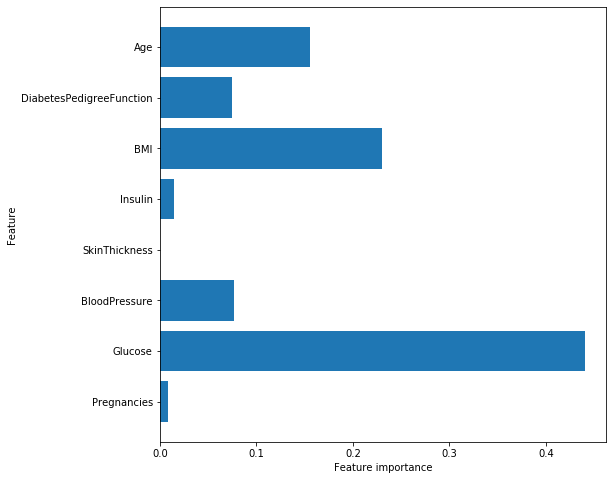

In [36]:
print(classifier2.feature_importances_)
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier2)

## Moving on to Random Forests

Let's create a random forest which has 100 trees and has a max_depth of 5.


In sklearn the number of trees is set by the `n_estimators` parameter and the number of features used per tree is set by the `max_features` parameter.

`n_estimators` = $m$<br>
`max_features` = $p$

In [15]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, oob_score=True, bootstrap=True)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### Get accuracy of training data

In [16]:
forest.score(X_train, y_train)

0.8550488599348535

#### Get oob score to see how this will generalize

In [17]:
forest.oob_score_

0.757328990228013

#### Print AUC Score

In [18]:
y_pred = forest.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8067635418512612

#### Print Confusion Matrix

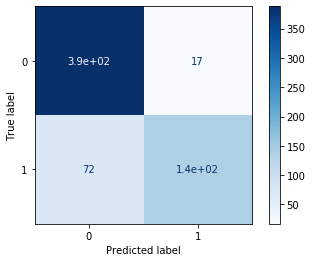

In [19]:
#__SOLUTION
plot_confusion_matrix(forest, X_train, y_train, cmap='Blues')


#### Plot Feature Importances

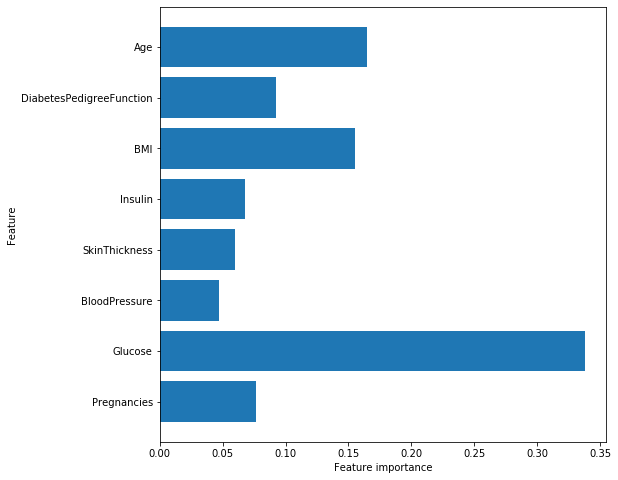

In [20]:
plot_feature_importances(forest)

Is our random forest model better than our decision tree?  Did the feature importances change?  How so?

### Let us try to fine tune this model a bit

### Hyper-parameters for Random Forests

`n_estimators` : the number of trees in the forest<br>
`criterion`: “gini”,”entropy” <br>
`max_features`: the number of random features to be considered when looking for the best split <br>
`max_depth`:  the maximum number of levels of a tree<br>
`bootstrap`: whether or not bootstrap samples are used to build trees <br>
`oob_score`: whether or not to use out-of-bag samples to estimate the generalization accuracy<br>
`n_jobs`: how many cores you want to use when training your trees<br>


## Your Turn

In your group:

- pick at least 3 hyperparameters above to tune your model using gridsearch or randomizedsearch
- fit your search method to your training data
- use the best parameters to run a "best random forest model"
- print the accuracy score, oob score, AUC and confusion matrix of this model
- make a visualization of the feature importances like we did with our decision tree model
- compare the performance of the random forest model to `classifier2`.  Which is the better model?  Why do you say that?  What are the risks of making false positives and false negatives in the context of this data?

In [21]:
#your code here

**YOUR COMPARISON HERE**

In [22]:

#__SOLUTION__
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 100, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5],
}

In [23]:
#__SOLUTION__
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_train, y_train)
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [24]:
#__SOLUTION__
best_randfor = gs.best_estimator_
best_randfor.score(X_train, y_train)

0.8501628664495114

In [25]:
#__SOLUTION
best_randfor.oob_score_

0.7687296416938111

In [26]:
#__SOLUTION__
y_pred = best_randfor.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8053753913403036

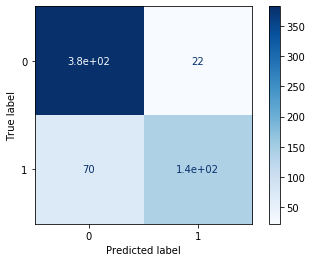

In [27]:
#__SOLUTION
plot_confusion_matrix(best_randfor, X_train, y_train, cmap='Blues')


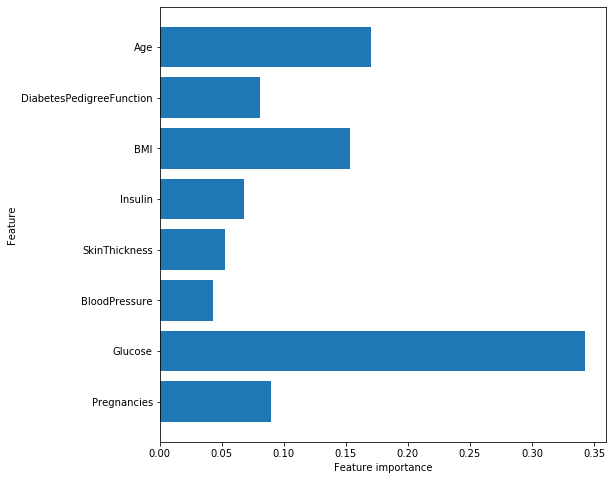

In [28]:
#__SOLUTION__
plot_feature_importances(best_randfor)

### Benefits
**Strong performance**: The Random Forest algorithm usually has very strong performance on most problems, when compared with other classification algorithms. Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well.

**Interpretability**: Conveniently, since each tree in the Random Forest is a Glass-Box Model (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall Random Forest is, as well! You'll demonstrate this yourself in the upcoming lab, by inspecting feature importances for both individual trees and the entire Random Forest itself.

### Drawbacks
**Computational Complexity**: Like any ensemble method, training multiple models means paying the computational cost of training each model. On large datasets, the runtime can be quite slow compared to other algorithms.

**Memory Usage**: Another side effect of the ensembled nature of this algorithm, having multiple models means storing each in memory. Random Forests tend to have a larger memory footprint that other models. Whereas a parametric model like a Logistic Regression just needs to store each of the coefficients, a Random Forest has to remember every aspect of every tree! It's not uncommon to see larger Random Forests that were trained on large datasets have memory footprints in the 10s, or even hundreds of MB. For data scientists working on modern computers, this isn't typically a problem--however, there are special cases where the memory footprint can make this an untenable choice--for instance, an app on a smartphone that uses machine learning may not be able to afford to spend that much disk space on a Random Forest model!

### Questions to consider

How do Random Forests handle the bias-variance tradeoff? <br>
What would be another way of using ensembling methods to tackle the bias-variance tradeoff?

Additional Resources on Random Forests

- https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
- https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Is RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)


Another flatiron slidedeck [here](https://docs.google.com/presentation/d/1bUwvdvg4bDRVzE3YaLSQZcsx-7t2ZFnaEGxjQHjxAoc/edit?usp=sharing)

# Bonus section:  Gradient Boosting!

- Creates a number of weak learners (decision trees that do only slightly better than random chance)
- Use weak learners to make predictions on training set. 
- Increase importance of observations where predictions were incorrect. 
- Decrease importance of observations where predictions were correct. 
- Train another batch of weak learners on training data with tweaked importances


![](./img/bagging_vs_boosting.png)

### Benefits

- Often has best-in-class performance compared to other models
- Can be used for Classification/Regression
- Some explainability (feature importances)
- Works well without scaling features
- Can use with mix of binary and continuous features


### Drawbacks

- Require careful tuning 
- May take a long time to train
- Often does not do well with high dimensional sparse data
- Larger/more computationally expensive than other shallow algorithms
- Regression predictions bounded by largest/smallest observations seen
- Model still mostly black-box due to complexity

#### Parameters to tune

`n_estimators` : number of trees to make

`learning_rate` : degree to which each tree is allowed to correct mistakes of previous trees

`max_depth` and `max_leaf_nodes` also are helpful to reduce the complexity of each tree

## Your turn!

Use the [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) in sklearn to do the following steps:

- Instantiate a "vanilla" gradient boosting classifier
- fit your search method to your training data
- use the best parameters to run a "best random forest model"
- print the score, AUC and confusion matrix of this model
- make a visualization of the feature importances like we did our models above
- compare the performance of this model with your best random forest model.  Which is the better model?  Why do you say that?  What are the risks of making false positives and false negatives in the context of this data?

In [29]:
#Your code here

In [30]:
#__SOLUTION__

from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier()
boost.fit(X_train, y_train)
boost.score(X_train, y_train)

0.9267100977198697

In [31]:
#__SOLUTION__
y_pred = boost.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9062378167641325

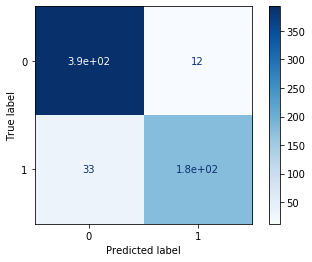

In [32]:
#__SOLUTION
plot_confusion_matrix(boost, X_train, y_train, cmap='Blues')


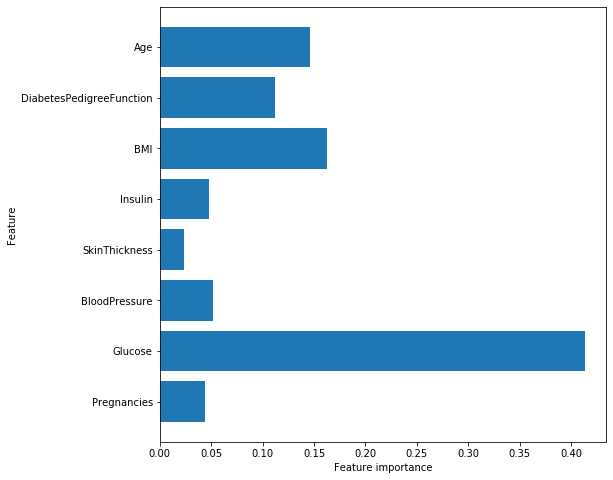

In [33]:
#__SOLUTION__
plot_feature_importances(boost)

## Final Test!

Using the best model you have produced for our diabetes data today, compute the accuracy on the test dataset.  How did it do?

In [34]:
#your code here

In [35]:
#__SOLUTION__

boost.score(X_test, y_test)

0.7922077922077922

### Additional resources on boosting

* SciKit-Learn Implementations

    * https://scikit-learn.org/stable/modules/ensemble.html#adaboost

    * https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

    * https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting

* Non-SciKit-Learn Implementations

    * https://github.com/catboost/catboost

    * https://github.com/microsoft/LightGBM

    * https://github.com/jhwjhw0123/Imbalance-XGBoost

    * https://github.com/dmlc/xgboost

    * https://github.com/stanfordmlgroup/ngboost

* Background

    * https://en.wikipedia.org/wiki/Gradient_boosting

    * https://explained.ai/gradient-boosting/index.html

    * https://en.wikipedia.org/wiki/AdaBoost

    * https://en.wikipedia.org/wiki/XGBoost

* Other

    * https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

    * https://github.com/szilard/GBM-perf

    * https://github.com/talperetz/awesome-gradient-boosting#notebooks

    * https://nbviewer.jupyter.org/github/jphall663/interpretable_machine_learning_with_python/blob/master/dt_surrogate_loco.ipynb
    
    * https://github.com/limexp/xgbfir